# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course</strong></font>

<font color='black' sizestyle='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Title**: Introduction to Deep Learning || **Session**: 4</em></font>


Neural Networks are one of the most widely utilized and capable tools in the field of artificial intelligence. In this notebook, we’ll delve into key elements of neural networks and construct a few straightforward examples for classification tasks.

## Binary Classification



To study and demonstrate neural network capabilities, we will try some classification examples.

First, we have to import all of the required libraries.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_blobs,make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Dataset

First we have to create a dataset:

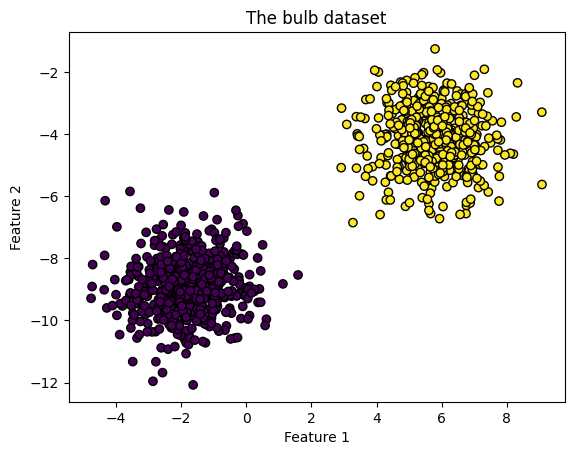

In [ ]:
#Create the dataset
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, center_box=(-10.0, 10.0), n_features=2,random_state=40)

#Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('The bulb dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Of course we also have to split the dataset into train and test parts.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now all of our tensors have to be converted to torch tensors (A type of tensor provided by Pytorch).

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Defining the Model

Here we will define the model. It consists of two linear layers. Here is a shape representing our model:


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        img {
            width: 50%;  /* Adjust the width as needed */
            max-width: 600px;  /* Set a maximum width */
            height: auto;  /* Maintain the aspect ratio */
        }
    </style>
</head>
<body>
    <img src="https://raw.githubusercontent.com/teimuri/Deep_learning_tutorials/3fb24ed3012a33a42f001fbc7b7a46dd22bd5947/Shapes/Input_nerual_network.svg" alt="Example SVG">
</body>
</html>


In [ ]:
# Define the Model
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

model = SimpleClassifier()

### Optimization

In our current task, we require two essential functions: one for the loss function and another for the optimization method, specifically Gradient Descent.

While there exists a wide variety of loss functions and optimizers, for the purposes of this notebook, we will focus on the simplest ones. Let’s break down the key components:

- `Loss Function` (Criterion): This function quantifies the discrepancy between our model’s predictions and the actual target values. For classification tasks, Binary Cross Entropy (BCE) is commonly used. We want to minimize this loss function.
- `Optimizer`: We’ll employ Gradient Descent as our optimization method. To fine-tune its behavior, we’ll provide a learning rate denoted as `lr`.

Remember that both `nn` (neural network) and `optim` (optimizer) are PyTorch modules that we previously imported.

In [ ]:

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

It is important to use GPU when there are many parallel calculations involved. This is the case for training Neural Networks.

In [ ]:
#Change this value to False if you want CPU for training
use_gpu = True

if use_gpu ==True:
    device = 'cuda'
else:
    device = 'cpu'

### Train Loop

Before starting the training we have to move the model and the training data to the GPU (`device` value is `'cuda'`).

In [ ]:
model = model.to(device)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

To train the model we have to iterate over the data and perform an optimization algorithm to reduce the loss value for each data point. We also have to loop over all of the data multiple times. Each loop is called an epoch.

In [ ]:
#@title Training Loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.0010
Epoch [20/5000], Loss: 0.0010
Epoch [30/5000], Loss: 0.0010
Epoch [40/5000], Loss: 0.0010
Epoch [50/5000], Loss: 0.0010
Epoch [60/5000], Loss: 0.0010
Epoch [70/5000], Loss: 0.0010
Epoch [80/5000], Loss: 0.0010
Epoch [90/5000], Loss: 0.0010
Epoch [100/5000], Loss: 0.0010
Epoch [110/5000], Loss: 0.0010
Epoch [120/5000], Loss: 0.0010
Epoch [130/5000], Loss: 0.0009
Epoch [140/5000], Loss: 0.0009
Epoch [150/5000], Loss: 0.0009
Epoch [160/5000], Loss: 0.0009
Epoch [170/5000], Loss: 0.0009
Epoch [180/5000], Loss: 0.0009
Epoch [190/5000], Loss: 0.0009
Epoch [200/5000], Loss: 0.0009
Epoch [210/5000], Loss: 0.0009
Epoch [220/5000], Loss: 0.0009
Epoch [230/5000], Loss: 0.0009
Epoch [240/5000], Loss: 0.0009
Epoch [250/5000], Loss: 0.0009
Epoch [260/5000], Loss: 0.0009
Epoch [270/5000], Loss: 0.0009
Epoch [280/5000], Loss: 0.0009
Epoch [290/5000], Loss: 0.0009
Epoch [300/5000], Loss: 0.0009
Epoch [310/5000], Loss: 0.0009
Epoch [320/5000], Loss: 0.0009
Epoch [330/5000],

### Evaluation

Our next step involves evaluating the model. To ensure compatibility with certain libraries, we need to transfer the model back from the GPU to the CPU.



In [ ]:
model = model.to('cpu')

Now we can evaluate the model on the test data.

Accuracy: 100.00


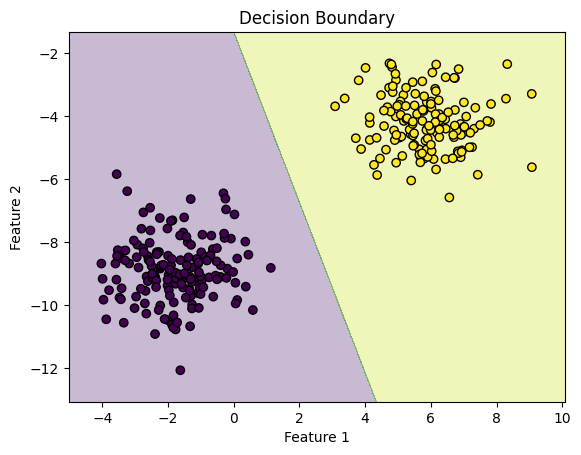

In [ ]:
#@title Evaluate the Model


model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
    print(f'Accuracy: {100*accuracy:.2f}')

# Plot the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)


We have an accuracy of 100!!!

However, this was expected since the input data was pretty easy to classify.

Let's try a harder example.



## Harder Example

We will use a different type of dataset which is harder to classify. `make_moons` will do.

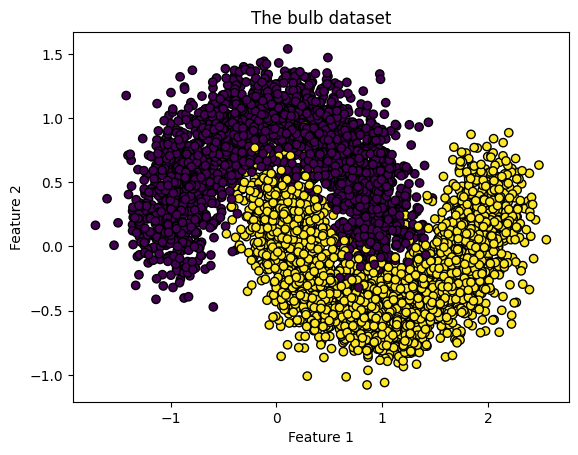

In [ ]:
#Create the dataset

X, y = make_moons(n_samples=5000, shuffle=True, noise=0.2, random_state=None)

#Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('The bulb dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Converting to torch tensors as before

In [ ]:
# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Simple Model
If we use our previously defined model and train it on our new dataset, we achieve an accuracy of 88.6%. However, upon examining the decision boundary (illustrated in the image below), we notice that it appears almost as a straight line, which may not be ideal. Perhaps there are opportunities to improve the model further.

<div>
<img src="https://drive.google.com/uc?export=view&id=1_qayg2ZYCrQarMKFKfgDCiJLHtFrL1xu" width="650"/>
</div>

### Bigger Model

Let's make a model that is both deepr and wider. Here is how it's gonna look:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        img {
            width: 50%;  /* Adjust the width as needed */
            max-width: 600px;  /* Set a maximum width */
            height: auto;  /* Maintain the aspect ratio */
        }
    </style>
</head>
<body>
    <img src="https://raw.githubusercontent.com/teimuri/Deep_learning_tutorials/37bae0d242a853cfb5d266c3f61eef968a0a6775/Shapes/Big_model.svg" alt="Example SVG">
</body>
</html>

And here we will define it as the `ComplexClassifier` class:

In [ ]:
# Define the Model
class ComplexClassifier(nn.Module):
    def __init__(self):
        super(ComplexClassifier, self).__init__()
        self.sequence = nn.Sequential(
            nn.Linear(2, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.sequence(x)
        return out

model = ComplexClassifier()

Once again we go through defining the necessary functions and training the model

In [ ]:
# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#@title Training Loop
model = model.cuda()
X_train_tensor = X_train_tensor.cuda()
y_train_tensor = y_train_tensor.cuda()
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.6019
Epoch [20/5000], Loss: 0.5314
Epoch [30/5000], Loss: 0.4833
Epoch [40/5000], Loss: 0.4483
Epoch [50/5000], Loss: 0.4211
Epoch [60/5000], Loss: 0.3987
Epoch [70/5000], Loss: 0.3799
Epoch [80/5000], Loss: 0.3638
Epoch [90/5000], Loss: 0.3499
Epoch [100/5000], Loss: 0.3375
Epoch [110/5000], Loss: 0.3265
Epoch [120/5000], Loss: 0.3164
Epoch [130/5000], Loss: 0.3073
Epoch [140/5000], Loss: 0.2989
Epoch [150/5000], Loss: 0.2912
Epoch [160/5000], Loss: 0.2841
Epoch [170/5000], Loss: 0.2775
Epoch [180/5000], Loss: 0.2714
Epoch [190/5000], Loss: 0.2657
Epoch [200/5000], Loss: 0.2604
Epoch [210/5000], Loss: 0.2554
Epoch [220/5000], Loss: 0.2507
Epoch [230/5000], Loss: 0.2464
Epoch [240/5000], Loss: 0.2423
Epoch [250/5000], Loss: 0.2385
Epoch [260/5000], Loss: 0.2348
Epoch [270/5000], Loss: 0.2314
Epoch [280/5000], Loss: 0.2281
Epoch [290/5000], Loss: 0.2250
Epoch [300/5000], Loss: 0.2220
Epoch [310/5000], Loss: 0.2191
Epoch [320/5000], Loss: 0.2164
Epoch [330/5000],

Accuracy: 98.0000


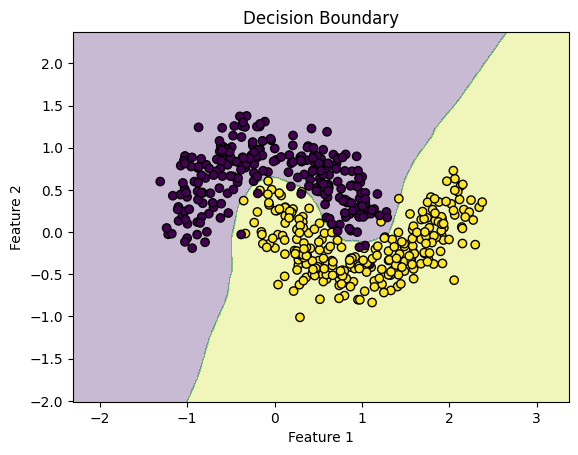

In [ ]:
#@title Evaluate the Model


model.eval()
model = model.cpu()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor.cpu())
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
    print(f'Accuracy: {100*accuracy:.4f}')

# Plot the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model.cpu())


There you go. It's much better now :)